# Hotel NLP Project - Book 1

### EDA and Feature Engineering


#### The target column of interest is Reviewer_Score.


Preliminary EDA steps

    - What is the shape of the dataset?
    - Let's convert the reviews into integers from 1 to 10
    - The reviews are scored from 1 to 10. Let's look at distribution.

In [304]:
# Importing the Libraries req

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

In [305]:
# Reading in the data and taking a look
htlrev = pd.read_csv('Hotel_Reviews.csv')
htlrev.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [306]:
# Looking at the shape of the dataset
htlrev.shape

(515738, 17)

In [307]:
htlrev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               515738 non-null  object 
 1   Additional_Number_of_Scoring                515738 non-null  int64  
 2   Review_Date                                 515738 non-null  object 
 3   Average_Score                               515738 non-null  float64
 4   Hotel_Name                                  515738 non-null  object 
 5   Reviewer_Nationality                        515738 non-null  object 
 6   Negative_Review                             515738 non-null  object 
 7   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 8   Total_Number_of_Reviews                     515738 non-null  int64  
 9   Positive_Review                             515738 non-null  object 
 

In [308]:
htlrev.isna().sum()/len(htlrev)

Hotel_Address                                 0.000000
Additional_Number_of_Scoring                  0.000000
Review_Date                                   0.000000
Average_Score                                 0.000000
Hotel_Name                                    0.000000
Reviewer_Nationality                          0.000000
Negative_Review                               0.000000
Review_Total_Negative_Word_Counts             0.000000
Total_Number_of_Reviews                       0.000000
Positive_Review                               0.000000
Review_Total_Positive_Word_Counts             0.000000
Total_Number_of_Reviews_Reviewer_Has_Given    0.000000
Reviewer_Score                                0.000000
Tags                                          0.000000
days_since_review                             0.000000
lat                                           0.006337
lng                                           0.006337
dtype: float64

Looks like there aren't a significant amount of null values except for the ~ 2000 missing values in the lat and lng columns. We will assume that the location wasnt picked up for these reviews and leave them for now since they fall under the 3% threshold required to consider filling those nulls.

In [309]:
# 1.2 Converting the review scores from floats to integers.
htlrev['Reviewer_Score'] = htlrev['Reviewer_Score'].astype(int)

In [310]:
#Check
htlrev['Reviewer_Score'].head()

0    2
1    7
2    7
3    3
4    6
Name: Reviewer_Score, dtype: int32

Expecting the distribution of the scores to be centered around the higher values as most people dont leave really bad reviews unless they've had a really bad experience which is a lot rarer than positive experiences. There probably is an outlier hotel that has more negative reviews than positive but even then people tend to start low ratings at ~3,4 or 5 out of 10. Expecting the lowest counts for the reviewer scores of 1, 2, and 3.

In [311]:
# Checking the counts of each score
htlrev['Reviewer_Score'].value_counts()

9     131184
10    115853
7      93241
8      88609
6      34344
5      30226
4      11553
3       6940
2       3788
Name: Reviewer_Score, dtype: int64

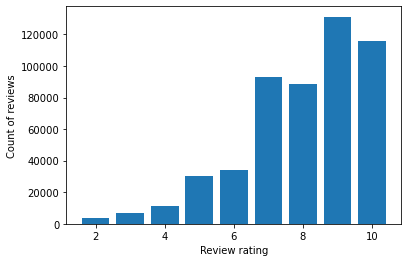

In [312]:
# Checking the actual distribution

values, counts = np.unique(htlrev['Reviewer_Score'], return_counts=True)
plt.figure()
plt.bar(values, counts)
plt.xlabel('Review rating')
plt.ylabel('Count of reviews')
plt.show()

As expected, the distrubution tends to be more concentrated around the higher scores. This can pose as a challenge because learning from a stream of data where you have class imbalance issues creates a classification model that will naturally misclassify the minority class. In our case, those minority classes are the lower scores and we dont want a model that is only good at predicting the majority class or the higher scores. A good solution for this would be to implement binning the lower scores together and encode a binary class of "Good" (1) or "Bad" (0).

### Let's indentify the non-numeric and numeric columns.

In [313]:
htlrev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               515738 non-null  object 
 1   Additional_Number_of_Scoring                515738 non-null  int64  
 2   Review_Date                                 515738 non-null  object 
 3   Average_Score                               515738 non-null  float64
 4   Hotel_Name                                  515738 non-null  object 
 5   Reviewer_Nationality                        515738 non-null  object 
 6   Negative_Review                             515738 non-null  object 
 7   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 8   Total_Number_of_Reviews                     515738 non-null  int64  
 9   Positive_Review                             515738 non-null  object 
 

In [314]:
htlrev.head(10)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968
5,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,Poland,Backyard of the hotel is total mess shouldn t...,17,1403,Good restaurant with modern design great chil...,20,1,6,"[' Leisure trip ', ' Group ', ' Duplex Double ...",10 days,52.360576,4.915968
6,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/17/2017,7.7,Hotel Arena,United Kingdom,Cleaner did not change our sheet and duvet ev...,33,1403,The room is spacious and bright The hotel is ...,18,6,4,"[' Leisure trip ', ' Group ', ' Duplex Twin Ro...",17 days,52.360576,4.915968
7,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/17/2017,7.7,Hotel Arena,United Kingdom,Apart from the price for the brekfast Everyth...,11,1403,Good location Set in a lovely park friendly s...,19,1,10,"[' Leisure trip ', ' Couple ', ' Duplex Double...",17 days,52.360576,4.915968
8,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/9/2017,7.7,Hotel Arena,Belgium,Even though the pictures show very clean room...,34,1403,No Positive,0,3,6,"[' Leisure trip ', ' Couple ', ' Duplex Double...",25 days,52.360576,4.915968
9,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/8/2017,7.7,Hotel Arena,Norway,The aircondition makes so much noise and its ...,15,1403,The room was big enough and the bed is good T...,50,1,7,"[' Leisure trip ', ' Couple ', ' Large King Ro...",26 days,52.360576,4.915968


##### Numeric columns: 

The Additional_Number_of_Scoring, Average_Score, Review_Total_Positive_Word_Counts, Review_Total_Negative_Word_Counts, Total_Number_of_Reviews_Reviewer_Has_Given,  Total_Number_of_Reviews, Reviewer_Score, and the lat/lng columns are all numeric columns. Most of these columns should stay numeric however there is further inspection required for the Additional_Number_of_Scoring column as it is not clear what this column is indicating. There seems to be similar values in this column when looking at reviews for the same hotel.

In [315]:
# Checking the value counts of the Hotel_name and Additional_Number_of_Scoring 
htlrev['Hotel_Name'].value_counts()

Britannia International Hotel Canary Wharf           4789
Strand Palace Hotel                                  4256
Park Plaza Westminster Bridge London                 4169
Copthorne Tara Hotel London Kensington               3578
DoubleTree by Hilton Hotel London Tower of London    3212
                                                     ... 
Ibis Styles Milano Palmanova                           12
Le Lavoisier                                           12
Mercure Paris Porte d Orleans                          10
Hotel Wagner                                           10
Hotel Gallitzinberg                                     8
Name: Hotel_Name, Length: 1492, dtype: int64

In [316]:
htlrev['Additional_Number_of_Scoring'].value_counts()

2682    4789
2288    4256
2623    4169
1831    3578
1936    3212
        ... 
7         56
5         39
17        24
1         13
4         12
Name: Additional_Number_of_Scoring, Length: 480, dtype: int64

Looks like there are just as many reviews (rows) for the top 5 hotels as there are rows for top 5 values in the "Additional_Number_of_Scoring" column. Seems like this column is terribly named and serves as more of a Hotel ID. In conclusion, we should avoid looking at this as a numeric column to include in our modelling.

##### Non-numeric columns:

In [317]:
# Getting a list of the non numeric columns

list(htlrev.select_dtypes(['object']).columns)

['Hotel_Address',
 'Review_Date',
 'Hotel_Name',
 'Reviewer_Nationality',
 'Negative_Review',
 'Positive_Review',
 'Tags',
 'days_since_review']

In [318]:
htlrev['Tags'].value_counts()

[' Leisure trip ', ' Couple ', ' Double Room ', ' Stayed 1 night ', ' Submitted from a mobile device ']                                                                                   5101
[' Leisure trip ', ' Couple ', ' Standard Double Room ', ' Stayed 1 night ', ' Submitted from a mobile device ']                                                                          4931
[' Leisure trip ', ' Couple ', ' Superior Double Room ', ' Stayed 1 night ', ' Submitted from a mobile device ']                                                                          4366
[' Leisure trip ', ' Couple ', ' Deluxe Double Room ', ' Stayed 1 night ', ' Submitted from a mobile device ']                                                                            3991
[' Leisure trip ', ' Couple ', ' Double Room ', ' Stayed 2 nights ', ' Submitted from a mobile device ']                                                                                  3291
                                             

In [319]:
htlrev['Reviewer_Nationality'].value_counts(ascending=False).head(30)

 United Kingdom               245246
 United States of America      35437
 Australia                     21686
 Ireland                       14827
 United Arab Emirates          10235
 Saudi Arabia                   8951
 Netherlands                    8772
 Switzerland                    8678
 Germany                        7941
 Canada                         7894
 France                         7296
 Israel                         6610
 Italy                          6114
 Belgium                        6031
 Turkey                         5444
 Kuwait                         4920
 Spain                          4737
 Romania                        4552
 Russia                         3900
 South Africa                   3821
 India                          3437
 Greece                         3406
 China                          3400
 Sweden                         3368
 New Zealand                    3237
 Singapore                      3091
 Hong Kong                      3013
 

In [320]:
htlrev['days_since_review'].value_counts()

1 days     2585
322 day    2308
120 day    2284
338 day    1963
534 day    1940
           ... 
327 day     199
615 day     194
122 day     192
124 day     173
123 day     143
Name: days_since_review, Length: 731, dtype: int64

### Let's do some feature engineering.

A. The 'tags' column seems to contain the tags about the specific experience itself ie. Number of occupants, nights stayed, type of room etc. It might be useful to use the One-Hot-Encoder to turn all these categorical values into numeric tables for analysis.

B 'Hotel_Address' and 'Hotel_Name' are unique values corresponding to each specific hotel in the data so these shouldn't change.

C. 'Review_Date' can definetely be a useful feature. The following article indicates that there are three seasons in the travel business; Peak(June to August), Shoulder(April to June, September and October) and Off-Season (November to March). Maybe we can effectively change this column into numeric values using these bins.
https://www.thestar.com/life/travel/2017/09/06/travel-smart-off-peak-travel.html#:~:text=There%20are%20three%20seasons%20in,season%20(November%20to%20March).

D. 'Negative_Review' and 'Positive_Review' both contain the Text Data we are going to be analyzing so these shouldn't change either.

E. 'Reviewer_Nationality' indicates the Nationality of the occupant but it seems that almost half of these are from the UK. We could turn this table into a binary numeric column where 1 would be if the Reviewer is from the UK and a 0 if its from anywhere else.

F. The 'days_since_review' column is an object with the string "day" or "days" attached to the number of days since the review. This should be changed into the numeric value only.

##### A : The 'tags' column seems to contain the tags about the specific experience itself ie. Number of occupants, nights stayed, type of room etc. It might be useful to use the One-Hot-Encoder to turn all these categorical values into numeric tables for analysis.


In [325]:
hotel_df1['Tags'].value_counts()

[' Leisure trip ', ' Couple ', ' Standard Double Room ', ' Stayed 1 night ', ' Submitted from a mobile device ']                                         510
[' Leisure trip ', ' Couple ', ' Double Room ', ' Stayed 1 night ', ' Submitted from a mobile device ']                                                  506
[' Leisure trip ', ' Couple ', ' Superior Double Room ', ' Stayed 1 night ', ' Submitted from a mobile device ']                                         434
[' Leisure trip ', ' Couple ', ' Deluxe Double Room ', ' Stayed 1 night ', ' Submitted from a mobile device ']                                           400
[' Leisure trip ', ' Couple ', ' Double Room ', ' Stayed 2 nights ', ' Submitted from a mobile device ']                                                 322
                                                                                                                                                        ... 
[' Leisure trip ', ' Couple ', ' Accessible Queen Guest Ro

In [326]:
#Splitting the tags and creating a new DF to work with the new tables
df2 = hotel_df1['Tags'].str.split(',', expand=True)
df2

,0,1,2,3,4,5
147870,[' Leisure trip ',' Family with young children ',' Premier King Room with City View ',' Stayed 1 night ',' Submitted from a mobile device '],None
195626,[' Business trip ',' Solo traveler ',' Deluxe Single Room ',' Stayed 2 nights ',' Submitted from a mobile device '],None
38033,[' Leisure trip ',' Couple ',' Classic Double or Twin Room ',' Stayed 2 nights ',' Submitted from a mobile device '],None
8957,[' Leisure trip ',' Couple ',' Superior Double Room ',' Stayed 2 nights ',' Submitted from a mobile device '],None
511901,[' Leisure trip ',' Couple ',' Double Room ',' Stayed 3 nights '],None,None
...,...,...,...,...,...,...
313476,[' Business trip ',' Couple ',' Executive Double or Twin Room ',' Stayed 2 nights ',' Submitted from a mobile device '],None
204417,[' Business trip ',' Solo traveler ',' Standard Double Room ',' Stayed 1 night '],None,None
330608,[' Leisure trip ',' Family with older children ',' Twin Room 1 2 Adults ',' Stayed 3 nights '],None,None
196286,[' Leisure trip ',' Couple ',' Deluxe Double Room ',' Stayed 3 nights ',' Submitted from a mobile device '],None


In [327]:
df2[0].value_counts()

[' Leisure trip '                  41686
[' Business trip '                  8256
[' Couple '                          600
[' Solo traveler '                   423
[' Family with young children '      213
[' With a pet '                      152
[' Group '                           147
[' Family with older children '       88
[' Travelers with friends '            7
[' Group ']                            2
Name: 0, dtype: int64

In [328]:
df2[1].value_counts(ascending=False).head(10)

 ' Couple '                        24435
 ' Solo traveler '                 10494
 ' Group '                          6319
 ' Family with young children '     5891
 ' Family with older children '     2616
 ' Travelers with friends '          191
 ' Leisure trip '                    128
 ' Double Room '                     105
 ' Standard Double Room '             92
 ' Superior Double Room '             88
Name: 1, dtype: int64

In [329]:
df2[2].value_counts(ascending=False).head(10)

 ' Double Room '                     3468
 ' Standard Double Room '            3135
 ' Superior Double Room '            3058
 ' Deluxe Double Room '              2319
 ' Double or Twin Room '             2142
 ' Standard Double or Twin Room '    1647
 ' Classic Double Room '             1606
 ' Superior Double or Twin Room '    1355
 ' 2 rooms '                         1165
 ' Standard Twin Room '               917
Name: 2, dtype: int64

In [330]:
df2[3].value_counts(ascending=False).head(10)

 ' Stayed 1 night '                     11210
 ' Stayed 2 nights '                     7746
 ' Stayed 1 night ']                     7335
 ' Stayed 3 nights '                     5540
 ' Stayed 2 nights ']                    5303
 ' Stayed 3 nights ']                    3817
 ' Stayed 4 nights '                     2798
 ' Stayed 4 nights ']                    1954
 ' Stayed 5 nights '                     1121
 ' Submitted from a mobile device ']      926
Name: 3, dtype: int64

In [331]:
df2[4].value_counts()

 ' Submitted from a mobile device ']    29751
 ' Stayed 1 night '                        33
 ' Stayed 2 nights ']                      23
 ' Stayed 3 nights '                       20
 ' Stayed 1 night ']                       19
 ' Stayed 2 nights '                       15
 ' Stayed 3 nights ']                      14
 ' Stayed 4 nights '                        9
 ' Stayed 5 nights '                        4
 ' Stayed 6 nights '                        3
 ' Stayed 7 nights '                        1
 ' Stayed 14 nights '                       1
 ' Stayed 7 nights ']                       1
 ' Stayed 5 nights ']                       1
Name: 4, dtype: int64

In [332]:
df2[5].value_counts()

 ' Submitted from a mobile device ']    86
Name: 5, dtype: int64

Seems like the split function cannot work here as the tag's dont follow any specific order and the tags are spread out accross all the tables we've created from the split. However, there are some categories that can be inferred and we can create the following numeric tables from this information.

1. The trips seems to be either for Leisure or for Business so a binary column can be created for these tags.
2. There can be a 'number of occupants' column made from the tags Couple, Solo Traveler, Family, Group.
3. There are many different type of rooms that are tagged but it seems reasonable to split these tags between Room or Suite and create another binary column.
4. Can make another numeric column for the number of nights stayed.
5. Can make another numeric binary column for whether or not the review was submitted from  a mobile device or not.


In [333]:
# Making a copy to work with
df3 = hotel_df1.copy()
df3.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
147870,31 St Thomas Street Southwark London SE1 9QU U...,732,10/25/2015,9.4,Shangri La Hotel at The Shard London,United Kingdom,Bit of a taxi ride from shopping in Knightsbr...,46,2200,Wow factor Nice buzzie bar with unrivalled vi...,15,1,1,"[' Leisure trip ', ' Family with young childre...",648 day,51.504497,-0.085556
195626,5 7 Princes Square Kensington and Chelsea Lond...,371,3/9/2017,7.3,The Premier Notting Hill,United Kingdom,The shower was a little slow,8,2215,I really liked the location and the value for...,27,2,1,"[' Business trip ', ' Solo traveler ', ' Delux...",147 day,51.512745,-0.192644
38033,12 boulevard Malesherbes 8th arr 75008 Paris F...,139,11/21/2016,8.4,Waldorf Madeleine,Turkey,The breakfast is not as expected,8,1184,At the heart of Paris Very helpful staff,10,24,1,"[' Leisure trip ', ' Couple ', ' Classic Doubl...",255 day,48.871583,2.322485
8957,1 Inverness Terrace Westminster Borough London...,1274,8/18/2016,7.7,Grand Royale London Hyde Park,Ireland,No Negative,0,6539,Beautiful hotel great staff the Manager himse...,31,1,1,"[' Leisure trip ', ' Couple ', ' Superior Doub...",350 day,51.510995,-0.186342
511901,Wiedner Hauptstr 27 29 04 Wieden 1040 Vienna A...,279,9/4/2015,8.8,Hotel Erzherzog Rainer,Greece,too noisy,3,3598,No Positive,0,1,0,"[' Leisure trip ', ' Couple ', ' Double Room '...",699 day,48.195323,16.367288


In [334]:
#1. The trips seems to be either for Leisure or for Business so a binary column can be created for these tags.

Leisure = df3['Tags'].str.contains('Leisure')

df3['Leisure'] = np.where(Leisure, 1 , 0)

In [335]:
#Check
df3['Leisure'].value_counts()

1    41815
0     9759
Name: Leisure, dtype: int64

In [336]:
#2. There can be a 'number of occupants' column made from the tags Couple, Solo Traveler, Family, Group.
Solo = df3['Tags'].str.contains('Solo')
Couple = df3['Tags'].str.contains('Couple')
Group = df3['Tags'].str.contains('Group|friends|Family')
df3['Number_of_Occupants'] = np.where(Solo, 1, np.where(Couple, 2, np.where(Group, 3, 0)))



In [337]:
# Check
df3['Number_of_Occupants'].value_counts()

2    25112
3    15527
1    10935
Name: Number_of_Occupants, dtype: int64

In [338]:
#3. There are many different type of rooms that are tagged but it seems reasonable to split these tags between Room or Suite and create another binary column.
Suite = df3['Tags'].str.contains('Suite|Executive')

df3['Suite/Exec'] = np.where(Suite, 1 , 0)

In [339]:
#Check
df3['Suite/Exec'].value_counts()

0    47846
1     3728
Name: Suite/Exec, dtype: int64

In [340]:
#4. Can make another numeric column for the number of nights stayed.
n1 = df3['Tags'].str.contains('Stayed 1 night')
n2 = df3['Tags'].str.contains('Stayed 2 night')
n3 = df3['Tags'].str.contains('Stayed 3 night')
n4 = df3['Tags'].str.contains('Stayed 4 night')
n5 = df3['Tags'].str.contains('Stayed 5 night')
n6 = df3['Tags'].str.contains('Stayed 6 night')
n7 = df3['Tags'].str.contains('Stayed 7 night')
n8 = df3['Tags'].str.contains('Stayed 14 night') #a jump from 7-14 might skew the model so we will give these the value of 8


df3['NightsStayed'] = np.where(n1, 1, 
                               np.where(n2, 2, 
                                        np.where(n3, 3, 
                                                 np.where(n4, 4, 
                                                          np.where(n5, 5, 
                                                                   np.where(n6, 6,np.where(n7, 7,np.where(n8, 8, 1))))))))

In [341]:
#Check
df3['NightsStayed'].value_counts()

1    19864
2    13411
3     9613
4     4870
5     2079
6      958
7      758
8       21
Name: NightsStayed, dtype: int64

In [342]:
#5. Can make another numeric binary column for whether or not the review was submitted from a mobile device or not.
MobileReview = df3['Tags'].str.contains('mobile')

df3['MobileReview'] = np.where(MobileReview, 1 , 0)

In [343]:
#Check
df3['MobileReview'].value_counts()

1    30769
0    20805
Name: MobileReview, dtype: int64

In [344]:
#Check if the extra columns we made have been added
df3.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,...,Reviewer_Score,Tags,days_since_review,lat,lng,Leisure,Number_of_Occupants,Suite/Exec,NightsStayed,MobileReview
147870,31 St Thomas Street Southwark London SE1 9QU U...,732,10/25/2015,9.4,Shangri La Hotel at The Shard London,United Kingdom,Bit of a taxi ride from shopping in Knightsbr...,46,2200,Wow factor Nice buzzie bar with unrivalled vi...,...,1,"[' Leisure trip ', ' Family with young childre...",648 day,51.504497,-0.085556,1,3,0,1,1
195626,5 7 Princes Square Kensington and Chelsea Lond...,371,3/9/2017,7.3,The Premier Notting Hill,United Kingdom,The shower was a little slow,8,2215,I really liked the location and the value for...,...,1,"[' Business trip ', ' Solo traveler ', ' Delux...",147 day,51.512745,-0.192644,0,1,0,2,1
38033,12 boulevard Malesherbes 8th arr 75008 Paris F...,139,11/21/2016,8.4,Waldorf Madeleine,Turkey,The breakfast is not as expected,8,1184,At the heart of Paris Very helpful staff,...,1,"[' Leisure trip ', ' Couple ', ' Classic Doubl...",255 day,48.871583,2.322485,1,2,0,2,1
8957,1 Inverness Terrace Westminster Borough London...,1274,8/18/2016,7.7,Grand Royale London Hyde Park,Ireland,No Negative,0,6539,Beautiful hotel great staff the Manager himse...,...,1,"[' Leisure trip ', ' Couple ', ' Superior Doub...",350 day,51.510995,-0.186342,1,2,0,2,1
511901,Wiedner Hauptstr 27 29 04 Wieden 1040 Vienna A...,279,9/4/2015,8.8,Hotel Erzherzog Rainer,Greece,too noisy,3,3598,No Positive,...,0,"[' Leisure trip ', ' Couple ', ' Double Room '...",699 day,48.195323,16.367288,1,2,0,3,0


In [345]:
#Drop the tags column now that we've extracted what we need from it
df3.drop('Tags', axis=1, inplace=True)
df3.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,...,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,days_since_review,lat,lng,Leisure,Number_of_Occupants,Suite/Exec,NightsStayed,MobileReview
147870,31 St Thomas Street Southwark London SE1 9QU U...,732,10/25/2015,9.4,Shangri La Hotel at The Shard London,United Kingdom,Bit of a taxi ride from shopping in Knightsbr...,46,2200,Wow factor Nice buzzie bar with unrivalled vi...,...,1,1,648 day,51.504497,-0.085556,1,3,0,1,1
195626,5 7 Princes Square Kensington and Chelsea Lond...,371,3/9/2017,7.3,The Premier Notting Hill,United Kingdom,The shower was a little slow,8,2215,I really liked the location and the value for...,...,2,1,147 day,51.512745,-0.192644,0,1,0,2,1
38033,12 boulevard Malesherbes 8th arr 75008 Paris F...,139,11/21/2016,8.4,Waldorf Madeleine,Turkey,The breakfast is not as expected,8,1184,At the heart of Paris Very helpful staff,...,24,1,255 day,48.871583,2.322485,1,2,0,2,1
8957,1 Inverness Terrace Westminster Borough London...,1274,8/18/2016,7.7,Grand Royale London Hyde Park,Ireland,No Negative,0,6539,Beautiful hotel great staff the Manager himse...,...,1,1,350 day,51.510995,-0.186342,1,2,0,2,1
511901,Wiedner Hauptstr 27 29 04 Wieden 1040 Vienna A...,279,9/4/2015,8.8,Hotel Erzherzog Rainer,Greece,too noisy,3,3598,No Positive,...,1,0,699 day,48.195323,16.367288,1,2,0,3,0


##### B: 'Hotel_Address' and 'Hotel_Name' are unique values corresponding to each specific hotel in the data so these shouldn't change.

In [346]:
#These are non numeric columns so let's drop them
df3.drop('Hotel_Address', axis=1, inplace=True)
df3.drop('Hotel_Name', axis=1, inplace=True)
df3.head()

,Additional_Number_of_Scoring,Review_Date,Average_Score,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,days_since_review,lat,lng,Leisure,Number_of_Occupants,Suite/Exec,NightsStayed,MobileReview
147870,732,10/25/2015,9.4,United Kingdom,Bit of a taxi ride from shopping in Knightsbr...,46,2200,Wow factor Nice buzzie bar with unrivalled vi...,15,1,1,648 day,51.504497,-0.085556,1,3,0,1,1
195626,371,3/9/2017,7.3,United Kingdom,The shower was a little slow,8,2215,I really liked the location and the value for...,27,2,1,147 day,51.512745,-0.192644,0,1,0,2,1
38033,139,11/21/2016,8.4,Turkey,The breakfast is not as expected,8,1184,At the heart of Paris Very helpful staff,10,24,1,255 day,48.871583,2.322485,1,2,0,2,1
8957,1274,8/18/2016,7.7,Ireland,No Negative,0,6539,Beautiful hotel great staff the Manager himse...,31,1,1,350 day,51.510995,-0.186342,1,2,0,2,1
511901,279,9/4/2015,8.8,Greece,too noisy,3,3598,No Positive,0,1,0,699 day,48.195323,16.367288,1,2,0,3,0


##### C: 'Review_Date' can definetely be a useful feature. The following article indicates that there are three seasons in the travel business; Peak(June to August), Shoulder(April to June, September and October) and Off-Season (November to March). Maybe we can effectively change this column into numeric values using these bins. https://www.thestar.com/life/travel/2017/09/06/travel-smart-off-peak-travel.html#:~:text=There%20are%20three%20seasons%20in,season%20(November%20to%20March).

In [347]:
# Extract Month from Review_Date
df3["Month"]=pd.DatetimeIndex(df3['Review_Date']).month

# Assigning Values for Season Type
# Peak Season = 3 for the months of June, July and August, 
# Shoulder = 2 for the months of April, May, September and October 
# else 3 for Offseason (Remaining Months)
df3["Season"] = df3["Month"].apply(lambda x: 1 if x in[6,7,8] else 2 if x in[4,5,9,10] else 3)

In [348]:
#Check
df3['Month'].sample(10)

306342     4
252203     3
484241    11
283703    12
99919      7
310624     1
313758     1
288401    10
18118      8
156195     4
Name: Month, dtype: int64

In [349]:
#Check
df3['Season'].value_counts()

3    19770
2    17568
1    14236
Name: Season, dtype: int64

In [350]:
#Lets drop the columns we no longer need
df3.drop('Review_Date', axis=1, inplace=True)
df3.drop('Month', axis=1, inplace=True)

##### D: 'Negative_Review' and 'Positive_Review' both contain the Text Data we are going to be analyzing so these shouldn't change either.
We are just going to keep these columns as is instructed.

##### E: 'Reviewer_Nationality' indicates the Nationality of the occupant but it seems that almost half of these are from the UK. We could turn this table into a binary numeric column where 1 would be if the Reviewer is from the UK and a 0 if its from anywhere else.

In [351]:
#Changing the Reviewer_Nationality column to something of use
ReviewfromUK = df3['Reviewer_Nationality'].str.contains('United Kingdom')

df3['ReviewfromUK'] = np.where(ReviewfromUK, 1 , 0)

In [352]:
#Check
df3['ReviewfromUK'].value_counts()

0    27114
1    24460
Name: ReviewfromUK, dtype: int64

In [353]:
#Lets drop the column we no longer need
df3.drop('Reviewer_Nationality', axis=1, inplace=True)

In [354]:
#Can also get rid of lat/lng column since we are splitting the data as review from UK and reviews not from UK
df3.drop('lat', axis=1, inplace=True)
df3.drop('lng', axis=1, inplace=True)

In [355]:
df3.head()

,Additional_Number_of_Scoring,Average_Score,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,days_since_review,Leisure,Number_of_Occupants,Suite/Exec,NightsStayed,MobileReview,Season,ReviewfromUK
147870,732,9.4,Bit of a taxi ride from shopping in Knightsbr...,46,2200,Wow factor Nice buzzie bar with unrivalled vi...,15,1,1,648 day,1,3,0,1,1,2,1
195626,371,7.3,The shower was a little slow,8,2215,I really liked the location and the value for...,27,2,1,147 day,0,1,0,2,1,3,1
38033,139,8.4,The breakfast is not as expected,8,1184,At the heart of Paris Very helpful staff,10,24,1,255 day,1,2,0,2,1,3,0
8957,1274,7.7,No Negative,0,6539,Beautiful hotel great staff the Manager himse...,31,1,1,350 day,1,2,0,2,1,1,0
511901,279,8.8,too noisy,3,3598,No Positive,0,1,0,699 day,1,2,0,3,0,2,0


##### F: The 'days_since_review' column is an object with the string "day" or "days" attached to the number of days since the review. This should be changed into the numeric value only.

In [356]:
# Extracting the integer from the days_since_review column into another column using REGEX
import re
df3['numberofdayssince'] = df3['days_since_review'].apply(lambda x: re.search(r'\d+', x).group())

In [357]:
#Check
df3['numberofdayssince'].sample(20)

391935    314
175092    505
289710    421
151193    535
318031    371
237430     37
342130    212
511549    625
285425    149
361259     66
154176    354
95156     555
271417    220
503065    705
434387     31
97640     688
125389    473
392444    466
353573    179
314358    509
Name: numberofdayssince, dtype: object

In [358]:
df3['numberofdayssince'] = df3['numberofdayssince'].astype(int)

In [359]:
#Drop the unneccesary column
df3.drop('days_since_review', axis=1, inplace=True)

In [360]:
#Final check
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51574 entries, 147870 to 444034
Data columns (total 17 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Additional_Number_of_Scoring                51574 non-null  int64  
 1   Average_Score                               51574 non-null  float64
 2   Negative_Review                             51574 non-null  object 
 3   Review_Total_Negative_Word_Counts           51574 non-null  int64  
 4   Total_Number_of_Reviews                     51574 non-null  int64  
 5   Positive_Review                             51574 non-null  object 
 6   Review_Total_Positive_Word_Counts           51574 non-null  int64  
 7   Total_Number_of_Reviews_Reviewer_Has_Given  51574 non-null  int64  
 8   Reviewer_Score                              51574 non-null  int64  
 9   Leisure                                     51574 non-null  int32  
 10  Numb

As we determined earlier the 'Additional_Number_of_Scoring' column seemed like a column ID so let's drop this last column before our Dataframe is ready.

In [361]:
#Dropping last column
df3.drop('Additional_Number_of_Scoring', axis=1, inplace=True)

- Let's convert the Reviewer_Score column into a binary column in the following way. Reviews that are below 9 should be encoded as 0 ('not good') and reviews with scores 9 and 10 as 1 ('good').
    
- Lets convert the columns you identified in question 2 into numeric columns, and drop all non-numeric columns except Positive_Review and Negative_Review.
    
- Split the data into train and test sets.
    

##### 515k rows seems computationally expensive for this laptop so we will take the recommended option to work with a random 10% sample of the dataset.

In [321]:
# Sampling 10% of the data to work with

hotel_df1 = htlrev.sample(frac=.1, random_state = 3)

In [322]:
# Looking at the shape for our sampled data set
hotel_df1.shape

(51574, 17)

In [323]:
# 3.1 Converting Reviewer Score into a binary column.
conversion_dict = {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0,9: 1, 10:1}
hotel_df1['Reviewer_Score'] = hotel_df1['Reviewer_Score'].map(conversion_dict)

In [324]:
# Check
hotel_df1['Reviewer_Score'].sample(25)

434889    0
377730    0
437776    0
120833    1
160779    1
406939    1
469344    0
213278    1
301444    0
95983     1
40228     1
126611    1
473027    1
57664     1
116496    0
416608    1
21231     0
312292    1
159542    1
370754    1
374870    0
340821    1
291068    0
67207     0
137864    0
Name: Reviewer_Score, dtype: int64

### 3.3 Split the data into train and test sets.

In [362]:
df3.head()

,Average_Score,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Leisure,Number_of_Occupants,Suite/Exec,NightsStayed,MobileReview,Season,ReviewfromUK,numberofdayssince
147870,9.4,Bit of a taxi ride from shopping in Knightsbr...,46,2200,Wow factor Nice buzzie bar with unrivalled vi...,15,1,1,1,3,0,1,1,2,1,648
195626,7.3,The shower was a little slow,8,2215,I really liked the location and the value for...,27,2,1,0,1,0,2,1,3,1,147
38033,8.4,The breakfast is not as expected,8,1184,At the heart of Paris Very helpful staff,10,24,1,1,2,0,2,1,3,0,255
8957,7.7,No Negative,0,6539,Beautiful hotel great staff the Manager himse...,31,1,1,1,2,0,2,1,1,0,350
511901,8.8,too noisy,3,3598,No Positive,0,1,0,1,2,0,3,0,2,0,699


In [363]:
#Define your X and Y
X = df3.drop('Reviewer_Score', axis = 1)
y = df3['Reviewer_Score']

In [364]:
#Check
X.head()

,Average_Score,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Leisure,Number_of_Occupants,Suite/Exec,NightsStayed,MobileReview,Season,ReviewfromUK,numberofdayssince
147870,9.4,Bit of a taxi ride from shopping in Knightsbr...,46,2200,Wow factor Nice buzzie bar with unrivalled vi...,15,1,1,3,0,1,1,2,1,648
195626,7.3,The shower was a little slow,8,2215,I really liked the location and the value for...,27,2,0,1,0,2,1,3,1,147
38033,8.4,The breakfast is not as expected,8,1184,At the heart of Paris Very helpful staff,10,24,1,2,0,2,1,3,0,255
8957,7.7,No Negative,0,6539,Beautiful hotel great staff the Manager himse...,31,1,1,2,0,2,1,1,0,350
511901,8.8,too noisy,3,3598,No Positive,0,1,1,2,0,3,0,2,0,699


In [365]:
#Implement the Train-Test Split of 25%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=6)

In [366]:
#Check Shapes
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(38680, 15)
(12894, 15)
(38680,)
(12894,)
